In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from matplotlib import style
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report
from sklearn import metrics


In [3]:
df=pd.read_csv('Stress-Lysis.csv')
df.head()

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [4]:
df.shape

(2001, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step_count    2001 non-null   int64  
 3   Stress_Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [6]:
df.describe()

,Humidity,Temperature,Step_count,Stress_Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


In [7]:
df['Stress_Level'].unique()

array([1, 2, 0], dtype=int64)

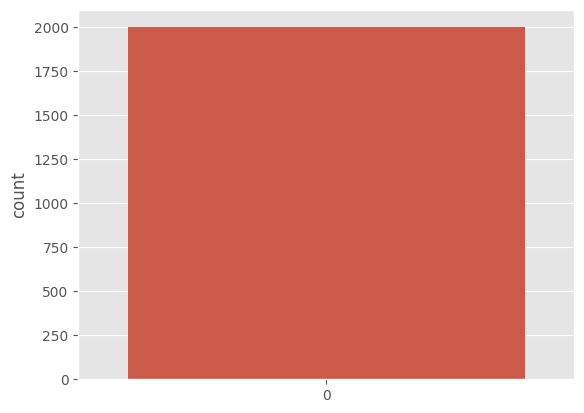

In [8]:
#style.use('ggplot')
#sns.countplot(df['Stress_Level'])

import matplotlib.pyplot as plt
import seaborn as sns

# Set the ggplot style
plt.style.use('ggplot')

# Create the count plot
sns.countplot(df['Stress_Level'])

# Show the plot
plt.show()


<Axes: xlabel='Humidity', ylabel='Temperature'>

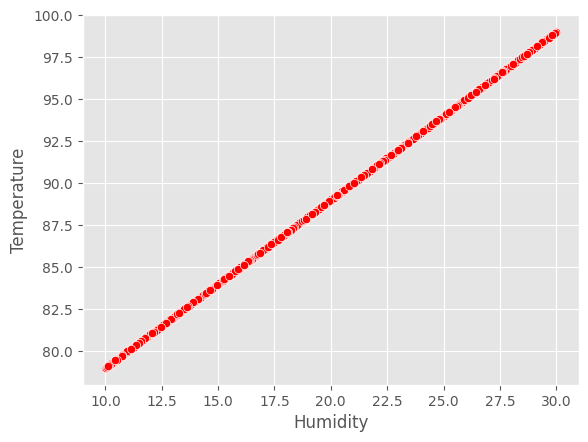

In [9]:
#sns.scatterplot(df['Humidity'],df['Temperature'],color='Red')
sns.scatterplot(data=df, x='Humidity', y='Temperature', color='Red')


In [10]:
grouped=df.groupby(['Stress_Level'])

In [11]:
grouped.get_group(2).describe()

,Humidity,Temperature,Step_count,Stress_Level
count,710.000000,710.000000,710.000000,710.0
mean,26.455000,95.455000,165.000000,2.0
std,2.051036,2.051036,20.508349,0.0
min,22.910000,91.910000,130.000000,2.0
25%,24.682500,93.682500,147.000000,2.0
50%,26.455000,95.455000,165.000000,2.0
75%,28.227500,97.227500,183.000000,2.0
max,30.000000,99.000000,200.000000,2.0


In [12]:
#df.groupby(['Step_count'])['Step_count','Stress_Level'].describe()
df.groupby(['Step_count'])[['Step_count', 'Stress_Level']].describe()


Step_count                                                  
                count   mean  std    min    25%    50%    75%    max   
Step_count                                                             
0                10.0    0.0  0.0    0.0    0.0    0.0    0.0    0.0  \
1                10.0    1.0  0.0    1.0    1.0    1.0    1.0    1.0   
2                10.0    2.0  0.0    2.0    2.0    2.0    2.0    2.0   
3                10.0    3.0  0.0    3.0    3.0    3.0    3.0    3.0   
4                10.0    4.0  0.0    4.0    4.0    4.0    4.0    4.0   
...               ...    ...  ...    ...    ...    ...    ...    ...   
196              10.0  196.0  0.0  196.0  196.0  196.0  196.0  196.0   
197              10.0  197.0  0.0  197.0  197.0  197.0  197.0  197.0   
198              10.0  198.0  0.0  198.0  198.0  198.0  198.0  198.0   
199              10.0  199.0  0.0  199.0  199.0  199.0  199.0  199.0   
200              10.0  200.0  0.0  200.0  200.0  200.0  200.0  200.0   

           Stress_Level                                          
                  count mean       std  min  25%  50%  75%  max  
Step_count                                                       
0                  10.0  0.4  0.516398  0.0  0.0  0.0  1.0  1.0  
1                  10.0  0.4  0.516398  0.0  0.0  0.0  1.0  1.0  
2                  10.0  0.4  0.516398  0.0  0.0  0.0  1.0  1.0  
3                  10.0  0.4  0.516398  0.0  0.0  0.0  1.0  1.0  
4                  10.0  0.4  0.516398  0.0  0.0  0.0  1.0  1.0  
...                 ...  ...       ...  ...  ...  ...  ...  ...  
196                10.0  2.0  0.000000  2.0  2.0  2.0  2.0  2.0  
197                10.0  2.0  0.000000  2.0  2.0  2.0  2.0  2.0  
198                10.0  2.0  0.000000  2.0  2.0  2.0  2.0  2.0  
199                10.0  2.0  0.000000  2.0  2.0  2.0  2.0  2.0  
200                10.0  2.0  0.000000  2.0  2.0  2.0  2.0  2.0  

[201 rows x 16 columns]

<Axes: >

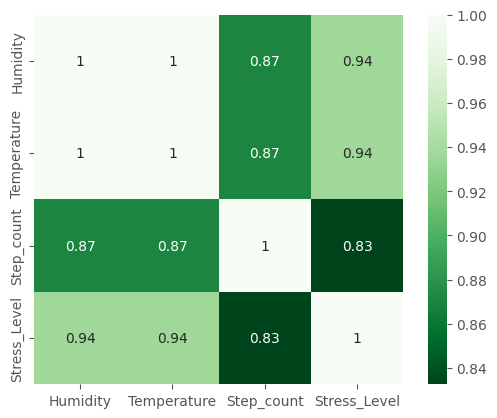

In [13]:
sns.heatmap(df.corr(),cmap='Greens_r',annot=True,square=True)

In [14]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x.shape,y.shape

((2001, 3), (2001,))

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=20)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((1600, 3), (401, 3), (1600,), (401,))

In [16]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=42)
logreg.fit(xtrain,ytrain)



LogisticRegression(random_state=42)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=24,metric='minkowski',p=2)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=24)

In [18]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',random_state=42)
svc.fit(xtrain,ytrain)

SVC(kernel='linear', random_state=42)

In [19]:
#Decision tree Algo
from sklearn.tree import DecisionTreeClassifier
dectree=DecisionTreeClassifier(criterion='entropy',random_state=42)
dectree.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [20]:
#Random forest ALgo
from sklearn.ensemble import RandomForestClassifier
ranfor=RandomForestClassifier(n_estimators=11,criterion='entropy',random_state=42)
ranfor.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [21]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss="hinge",shuffle=True,random_state=101)
sgd.fit(xtrain,ytrain) 

SGDClassifier(random_state=101)

In [22]:
MNB = MultinomialNB()
BNB = BernoulliNB()
SVM = SVC()
MNB.fit(xtrain, ytrain)
BNB.fit(xtrain, ytrain)
SVM.fit(xtrain, ytrain)
pred_mnb = MNB.predict(xtest)
pred_bnb = BNB.predict(xtest)
pred_svm = SVM.predict(xtest)



In [23]:
# Multinomial Accuracy 
print(f'Multinomial Accuracy: {accuracy_score(ytest, pred_mnb)}')

print(classification_report(ytest, pred_mnb))
print('MAE:',metrics.mean_absolute_error(ytest,pred_mnb))
print('MSE:',metrics.mean_squared_error(ytest,pred_mnb))
print(' Root MSE:',np.sqrt(metrics.mean_squared_error(ytest,pred_mnb)))


Multinomial Accuracy: 0.7182044887780549
              precision    recall  f1-score   support

           0       0.61      0.66      0.63        99
           1       0.70      0.50      0.58       158
           2       0.80      1.00      0.89       144

    accuracy                           0.72       401
   macro avg       0.70      0.72      0.70       401
weighted avg       0.71      0.72      0.70       401

MAE: 0.2817955112219451
MSE: 0.2817955112219451
 Root MSE: 0.5308441496540629


In [24]:
# Bernoulli Accuracy

print(f'Bernoulli Accuracy: {accuracy_score(ytest, pred_bnb)}')

print(classification_report(ytest, pred_bnb))
print('MAE:',metrics.mean_absolute_error(ytest,pred_bnb))
print('MSE:',metrics.mean_squared_error(ytest,pred_bnb))
print(' Root MSE:',np.sqrt(metrics.mean_squared_error(ytest,pred_bnb)))


Bernoulli Accuracy: 0.3940149625935162
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.39      1.00      0.57       158
           2       0.00      0.00      0.00       144

    accuracy                           0.39       401
   macro avg       0.13      0.33      0.19       401
weighted avg       0.16      0.39      0.22       401

MAE: 0.6059850374064838
MSE: 0.6059850374064838
 Root MSE: 0.7784504078016041


In [25]:
# SVM Accuracy
print(f'SVM Accuracy: {accuracy_score(ytest, pred_svm)}')

print(classification_report(ytest, pred_svm))
print('MAE:',metrics.mean_absolute_error(ytest,pred_svm))
print('MSE:',metrics.mean_squared_error(ytest,pred_svm))
print(' Root MSE:',np.sqrt(metrics.mean_squared_error(ytest,pred_svm)))



SVM Accuracy: 0.9975062344139651
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       0.99      1.00      1.00       158
           2       1.00      0.99      1.00       144

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401

MAE: 0.0024937655860349127
MSE: 0.0024937655860349127
 Root MSE: 0.04993761694389223


In [26]:
# Logistic Regression

Y_pred_logreg = logreg.predict(xtest)
accuracy_logreg = accuracy_score(ytest, Y_pred_logreg)
print("Logistic Regression: " + str(accuracy_logreg * 100))
print(classification_report(ytest, Y_pred_logreg))
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, Y_pred_logreg))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, Y_pred_logreg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, Y_pred_logreg)))

Logistic Regression: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       158
           2       1.00      1.00      1.00       144

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [27]:
# Linear Regression


from sklearn.linear_model import LinearRegression
lreg = LinearRegression().fit(xtrain, ytrain)
Y_pred_lreg = lreg.predict(xtest)
accuracy_lreg = accuracy_score(ytest, Y_pred_lreg.round())
print("Linear Regression: " + str(accuracy_lreg * 100))
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, Y_pred_lreg))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, Y_pred_lreg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, Y_pred_lreg)))



Linear Regression: 98.75311720698254
Mean Absolute Error: 0.2346212801640908
Mean Squared Error: 0.07473048087890018
Root Mean Squared Error: 0.27336876353910694


In [28]:
# LinearDiscriminantAnalysis


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis().fit(xtrain, ytrain)
Y_pred_lda = lda.predict(xtest)
accuracy_lda = accuracy_score(ytest, Y_pred_lda)
print("LinearDiscriminantAnalysis: " + str(accuracy_lda * 100))
print(classification_report(ytest, Y_pred_lda))
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, Y_pred_lda))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, Y_pred_lda))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, Y_pred_lda)))

LinearDiscriminantAnalysis: 97.0074812967581
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        99
           1       1.00      0.92      0.96       158
           2       0.97      1.00      0.98       144

    accuracy                           0.97       401
   macro avg       0.97      0.97      0.97       401
weighted avg       0.97      0.97      0.97       401

Mean Absolute Error: 0.029925187032418952
Mean Squared Error: 0.029925187032418952
Root Mean Squared Error: 0.17298897951146758


In [29]:
# Ridge 


from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
#Fitting the classifier into training set
clf.fit(xtrain,ytrain)
y_pred_ridge=clf.predict(xtest)
accuracy_ridge = accuracy_score(ytest, y_pred_ridge.round())
print("Ridge: " + str(accuracy_ridge * 100))
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred_ridge))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred_ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred_ridge)))


Ridge: 98.75311720698254
Mean Absolute Error: 0.23462124895460276
Mean Squared Error: 0.0747302901092936
Root Mean Squared Error: 0.2733684146153202


In [30]:
# Lasso

from sklearn.linear_model import Lasso
clf=Lasso(alpha=1.0)
#Fitting the classifier into training set
clf.fit(xtrain,ytrain)
y_pred_lasso=clf.predict(xtest)
accuracy_lasso = accuracy_score(ytest, y_pred_lasso.round())
print("Lasso: " + str(accuracy_lasso * 100))
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred_lasso))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred_lasso)))


Lasso: 77.3067331670823
Mean Absolute Error: 0.3303579699697452
Mean Squared Error: 0.16874732468751705
Root Mean Squared Error: 0.41078866182931223


In [31]:
#K Nearest neighbors

Y_pred_knn = knn.predict(xtest)
accuracy_knn = accuracy_score(ytest, Y_pred_knn)
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print(classification_report(ytest, Y_pred_knn))

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, Y_pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, Y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, Y_pred_knn)))


K Nearest neighbors: 99.75062344139651
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       0.99      1.00      1.00       158
           2       1.00      0.99      1.00       144

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401

Mean Absolute Error: 0.0024937655860349127
Mean Squared Error: 0.0024937655860349127
Root Mean Squared Error: 0.04993761694389223


In [32]:
# SVC( Support Vector Classifier)

Y_pred_svc = svc.predict(xtest)
accuracy_svc = accuracy_score(ytest, Y_pred_svc)
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print(classification_report(ytest, Y_pred_svc))

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, Y_pred_svc))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, Y_pred_svc))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, Y_pred_svc)))


Support Vector Classifier: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       158
           2       1.00      1.00      1.00       144

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [33]:
# Decision Tree

Y_pred_dectree = dectree.predict(xtest)
accuracy_dectree = accuracy_score(ytest, Y_pred_dectree)
print("Decision tree: " + str(accuracy_dectree * 100))
print(classification_report(ytest, Y_pred_dectree))

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, Y_pred_dectree))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, Y_pred_dectree))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, Y_pred_dectree)))


Decision tree: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       158
           2       1.00      1.00      1.00       144

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [34]:
# Random Forest 

Y_pred_ranfor = ranfor.predict(xtest)
accuracy_ranfor = accuracy_score(ytest, Y_pred_ranfor)
print("Random Forest: " + str(accuracy_ranfor * 100))
print(classification_report(ytest, Y_pred_ranfor))

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, Y_pred_ranfor))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, Y_pred_ranfor))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, Y_pred_ranfor)))


Random Forest: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       158
           2       1.00      1.00      1.00       144

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [35]:
#SGD(Stochastic Gradient Classifier) 


Y_pred_sgd = sgd.predict(xtest)
accuracy_sgd = accuracy_score(ytest, Y_pred_sgd)
print("Stochastic Gradient Classifier: " + str(accuracy_sgd * 100))
print(classification_report(ytest, Y_pred_sgd))

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, Y_pred_sgd))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, Y_pred_sgd))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, Y_pred_sgd)))


Stochastic Gradient Classifier: 97.50623441396509
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        99
           1       0.96      0.98      0.97       158
           2       0.98      0.99      0.98       144

    accuracy                           0.98       401
   macro avg       0.98      0.97      0.98       401
weighted avg       0.98      0.98      0.98       401

Mean Absolute Error: 0.02493765586034913
Mean Squared Error: 0.02493765586034913
Root Mean Squared Error: 0.15791661046371636
